# Kernel based discrepancies

Author: Jimmy Nguyen (nguyen.hoang.jimmy42@gmail.com)

This notebook walks through kernel based discrepancies using the Kronecker sequence.

One definition of discrepancy starts with a symmetric, positive definite kernel, $K:[0,1]^d\times [0,1]^d \to \mathbb{R}$, i.e.,
\begin{gather*}
K(\boldsymbol{t},\boldsymbol{x}) = K(\boldsymbol{x},\boldsymbol{t}) \qquad \forall \boldsymbol{t}, \boldsymbol{x} \in [0,1]^d \\
\sum_{i,j = 1}^{n} c_i K(\boldsymbol{x}_i,\boldsymbol{x}_j ) \boldsymbol{c}_j > 0 \qquad \forall \boldsymbol{c} \ne \boldsymbol{0}, \ \boldsymbol{x}_1, \ldots, \boldsymbol{x}_n \text{ distinct and } \in [0,1]^d
\end{gather*}
The discrepancy, $D(\{\boldsymbol{x}\}_{i=1}^n)$ is defined in terms of the kernel as
$$
[D(\{\boldsymbol{x}_i\}_{i=1}^n,K)]^2= \int_{[0,1]^d} \int_{[0,1]^d} K(\boldsymbol{t},\boldsymbol{x}) \, \mathrm{d}\boldsymbol{t} \mathrm{d}\boldsymbol{x}
- \frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(\boldsymbol{t}, \boldsymbol{x}_i) \, \mathrm{d}\boldsymbol{t}
+ \frac{1}{n^2} \sum_{i,j = 1}^n K(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$
The discrepancy requires $\mathcal{O}(dn^2)$ operations to compute, assuming one evaluation of the kernel requires $d$ operations to compute.

We can simplify the cost to compute the discrepancy for a randomly shifted Kronecker sequence:
$$
\begin{aligned}
\text{Kronecker: } \mathbb{E}\{[D(\{i\boldsymbol{\alpha} + \boldsymbol{\Delta} \bmod \boldsymbol{1}\}_{i=1}^n,K)]^2\}
& = - \int_{[0,1]^d} \widetilde{K}(\boldsymbol{t}) \, \mathrm{d}\boldsymbol{t} + \frac{1}{n^2} \sum_{i,j = 1}^n \int_{[0,1]^d} \widetilde{K}((i - j)\boldsymbol{\alpha} \bmod \boldsymbol{1}) \\
& =  - \int_{[0,1]^d} \widetilde{K}(\boldsymbol{t}) \, \mathrm{d}\boldsymbol{t} 
+ \frac 1{n^2} \sum_{k=1-n}^{n-1}  (n -  \lvert k \rvert)\widetilde{K}(k \boldsymbol{\alpha} \bmod \boldsymbol{1}) \\
& = - \int_{[0,1]^d} \widetilde{K}(\boldsymbol{t}) \, \mathrm{d}\boldsymbol{t}
+ \frac 1{n^2} \biggl[n \widetilde{K}(\boldsymbol{0}) +  2\sum_{k=1}^{n-1}  (n - k)\widetilde{K} (k \boldsymbol{\alpha} \bmod \boldsymbol{1}) \biggr] \\
\end{aligned}
$$

$$
2\sum_{k=1}^{n-1}  (n - k)\widetilde{K} (k \boldsymbol{\alpha} \bmod \boldsymbol{1}) \\
= 2\left(n\sum_{k=1}^{n-1} \widetilde{K} (k \boldsymbol{\alpha} \bmod \boldsymbol{1}) - \sum_{k=1}^{n-1} k\widetilde{K} (k \boldsymbol{\alpha} \bmod \boldsymbol{1})\right)
$$

After splitting the above summation, we can compute the discrepancy values for n = 1,2,...,N in $\mathcal{O}(dN)$ time.
The code can be found at qmcpy/discrete_distribution/kronecker.py.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qmcpy as qp

# Example with a Specified $\widetilde{K}$

Take $\widetilde{K}(x) = \prod_{\ell = 1}^d \left [1 + \gamma_\ell B_2(x_\ell) \right] = \prod_{\ell = 1}^d \left [1 + \gamma_\ell \left \{x_\ell(x_\ell - 1) + \frac 16 \right\}\right] $ with $d=2$ and $\gamma_\ell = 1$.

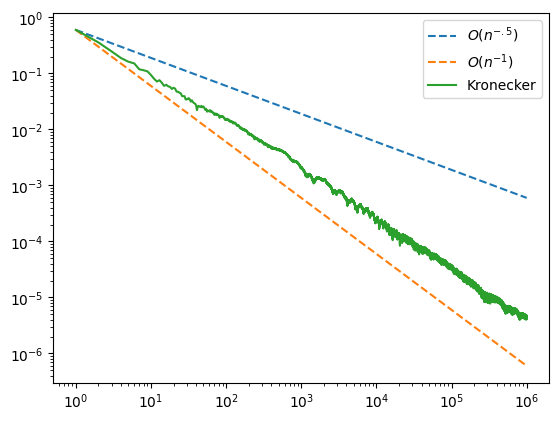

In [2]:
kronecker = qp.Kronecker(dimension=2, alpha=[np.sqrt(2) - 1, np.sqrt(3) - 1])
values = kronecker.periodic_discrepancy(n=int(1e6))

x = np.arange(1, int(1e6) + 1)
y = values[0] / x # multiply by values[0] to get the same starting point
y_half = values[0] / np.sqrt(x)

plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
plt.loglog(x, values, label="Kronecker")

plt.legend()
plt.show()

Some examples with random alphas:

[0.5488135  0.71518937]


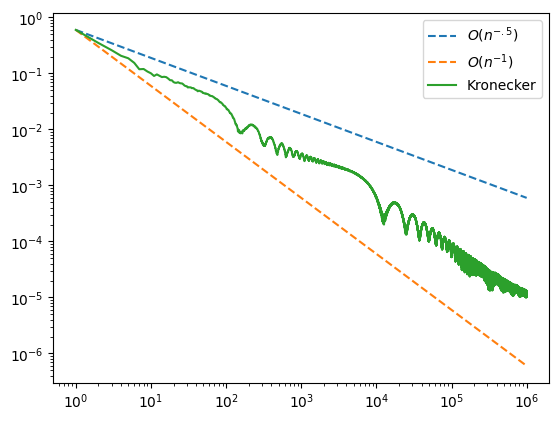

[0.417022   0.72032449]


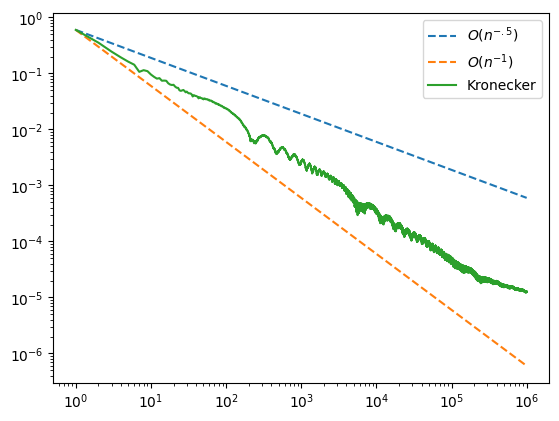

[0.4359949  0.02592623]


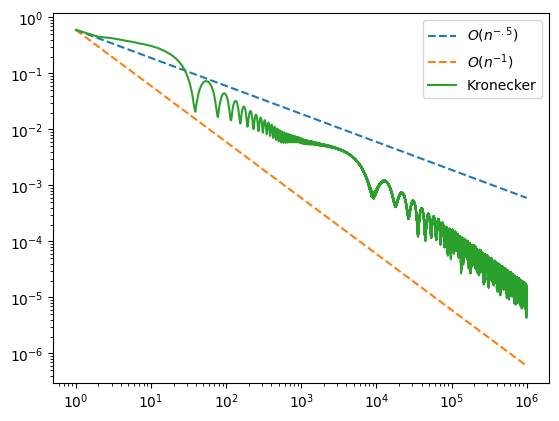

In [3]:
for i in range(3):
    np.random.seed(i)
    random = np.random.rand(2)
    print(random)
    kronecker = qp.Kronecker(dimension=2, alpha=random)
    values = kronecker.periodic_discrepancy(int(1e6))
    
    x = np.arange(1, int(1e6) + 1)
    y = values[0] / x # multiply by values[0] to get the same starting point
    y_half = values[0] / np.sqrt(x)

    plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
    plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
    plt.loglog(x, values, label="Kronecker")

    plt.legend()
    plt.show()

We can select good choices of alpha using alpha_generate() from Kronecker.ipynb. Coordinate weights 1/$\ell^2$ were used in the search.

Since we use a component by component search, we can use the first s alphas and they should be good alphas for s dimensions.

In [4]:
alpha = np.array([0.41970205, 0.30515781, 0.36519739, 0.22938431, 0.44863466, 0.28152844, 0.37796908, 0.17803384, 0.21661381, 0.23889719, 0.23588547, 0.26587686, 0.18453324, 0.35177543, 0.46455079, 0.12079046, 0.43843606, 0.14882175, 0.4532197, 0.17177015])

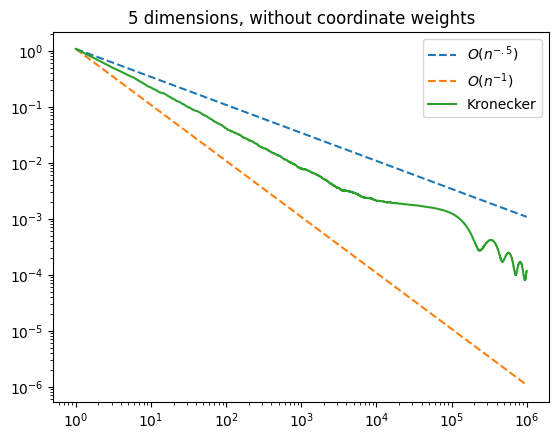

In [5]:
kronecker = qp.Kronecker(dimension=5, alpha=alpha[:5])
values = kronecker.periodic_discrepancy(int(1e6))
x = np.arange(1, int(1e6) + 1)
y = values[0] / x
y_half = values[0] / np.sqrt(x)

plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
plt.loglog(x, values, label="Kronecker")

plt.title('5 dimensions, without coordinate weights')
plt.legend()
plt.show()

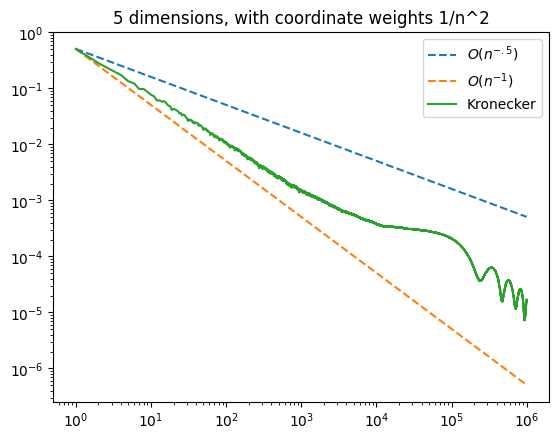

In [6]:
kronecker = qp.Kronecker(dimension=5, alpha=alpha[:5])
values = kronecker.periodic_discrepancy(int(1e6), gamma = 1 / (np.arange(1, 6) ** 2))
x = np.arange(1, int(1e6) + 1)
y = values[0] / x
y_half = values[0] / np.sqrt(x)

plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
plt.loglog(x, values, label="Kronecker")

plt.title('5 dimensions, with coordinate weights 1/n^2')
plt.legend()
plt.show()

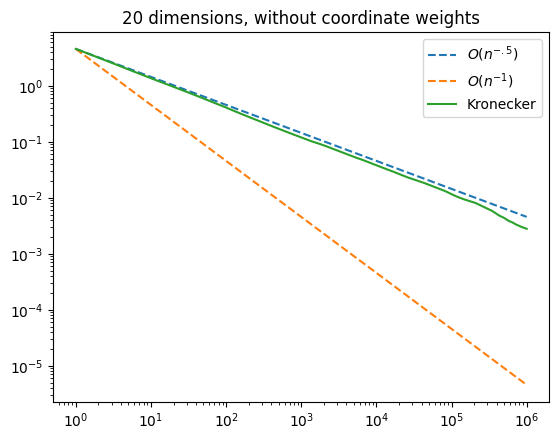

In [7]:
kronecker = qp.Kronecker(dimension=20, alpha=alpha)
values = kronecker.periodic_discrepancy(int(1e6) )
x = np.arange(1, int(1e6) + 1)
y = values[0] / x
y_half = values[0] / np.sqrt(x)

plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
plt.loglog(x, values, label="Kronecker")

plt.title('20 dimensions, without coordinate weights')
plt.legend()
plt.show()

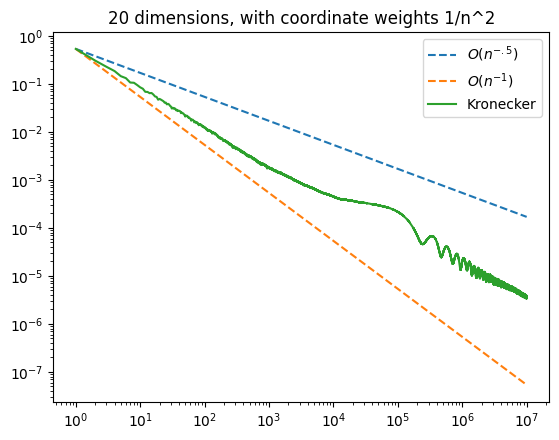

In [8]:
kronecker = qp.Kronecker(dimension=20, alpha=alpha)
values = kronecker.periodic_discrepancy(int(1e7), gamma= 1 / (np.arange(1, 21) ** 2))
x = np.arange(1, int(1e7) + 1)
y = values[0] / x
y_half = values[0] / np.sqrt(x)

plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
plt.loglog(x, values, label="Kronecker")

plt.title('20 dimensions, with coordinate weights 1/n^2')
plt.legend()
plt.show()

In [9]:
from sympy import nextprime
primes = np.empty(101, dtype=int)
primes[0] = 2
for i in range(1, 101):
    primes[i] = nextprime(primes[i-1])

primes

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547])

100
[0.41421356 0.73205081 0.23606798 0.64575131 0.31662479 0.60555128
 0.12310563 0.35889894 0.79583152 0.38516481 0.56776436 0.08276253
 0.40312424 0.55743852 0.8556546  0.28010989 0.68114575 0.81024968
 0.18535277 0.42614977 0.54400375 0.88819442 0.11043358 0.43398113
 0.8488578  0.04987562 0.14889157 0.34408043 0.44030651 0.63014581
 0.26942767 0.44552314 0.70469991 0.78982612 0.20655562 0.28820573
 0.52996409 0.76714533 0.92284798 0.15294644 0.37908816 0.45362405
 0.82027496 0.89244399 0.03566885 0.10673598 0.52583905 0.93318452
 0.06651917 0.13274595 0.26433752 0.45962483 0.5241747  0.84297952
 0.03121954 0.21727474 0.40121947 0.46207763 0.64331698 0.76305461
 0.82260384 0.11724277 0.52141547 0.63519209 0.69180601 0.80449381
 0.1934054  0.35755975 0.62793601 0.68154169 0.78829423 0.94729532
 0.15724406 0.31320792 0.46792233 0.57038579 0.72308292 0.92485885
 0.02498439 0.22374842 0.46948949 0.51828453 0.76053949 0.80865205
 0.95232684 0.04756518 0.1896201  0.37755833 0.47091055 0.

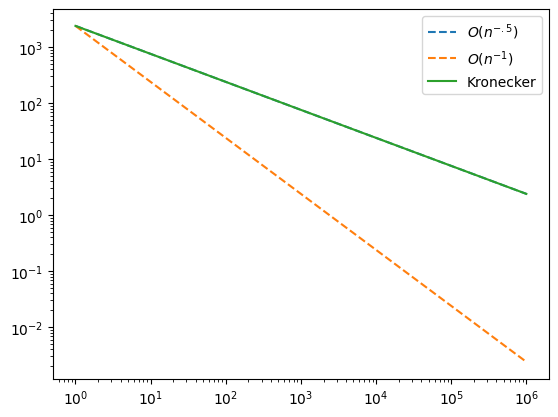

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import qmcpy as qp

kronecker = qp.Kronecker(dimension=101, alpha=['richtmyer'])
print(kronecker.alpha)

print(len(kronecker.alpha))
print(np.sqrt(541) % 1)
print(np.sqrt(547) % 1)

values = kronecker.periodic_discrepancy(n=int(1e6))

x = np.arange(1, int(1e6) + 1)
y = values[0] / x # multiply by values[0] to get the same starting point
y_half = values[0] / np.sqrt(x)

plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
plt.loglog(x, values, label="Kronecker")

plt.legend()
plt.show()